# Lab 3 - Numeric Derivatives

## Activity 1: Create and Examine Forward Difference Method 

In [81]:
#import functions to start
import numpy as np
import matplotlib.pyplot as plt

### First, examine the code below which has implemented the forward difference algorithm

In [82]:
def forwardDiff(x,y):
    h=x[1]-x[0] #find h based on delta x of data points
    yprime=np.diff(y)/h # get forward differences 
    xdiff=x[:-1:] # find corresponding x differences 
    return xdiff, yprime #return the arrays of forward difference values

Let's look at the performance of an example function: $y = 3x^2+2x$. Note we are picking a polynomial here becuase we can easily compute the analytic derivative. 

In [83]:
# create grid of x values and evaluate our function to get y(x)
x = np.arange(-10,10)
y = 3*x**2+2*x

Take the numeric derivative. Also define the known analytic derivative: $y'=6x+2$

In [84]:
# find analytic derivative using our function, specify h to be close to our delta x in the data grid
xalt,dy = forwardDiff(x,y)

#define the known analytic derivative for comparison - use the xalt array so that y prime and y will have the same length
yprime = 6*xalt+2

Plot and compare the results

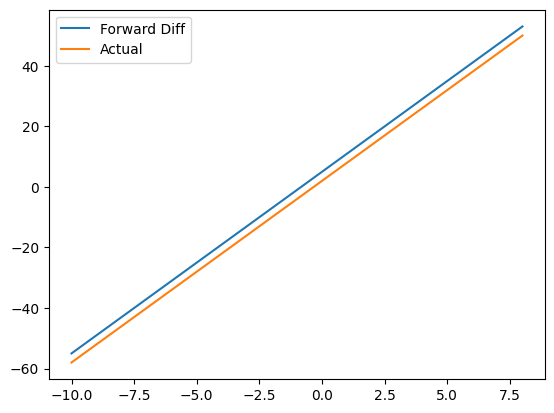

In [85]:
#Create plot
plt.figure()
plt.plot(xalt,dy,label='Forward Diff')
plt.plot(xalt,yprime,label='Actual')
plt.legend()
plt.show()

Calculate the maximum error between the forward difference and the actual solution from the previous plot. Compare with the value of the step size $h$ to determine if the error is reasonable.

In [86]:
max_error = max(abs(yprime - dy))
print(f'The maximum error is: {max_error:.2e}')

stepsize=x[1]-x[0]
print(f'The stepsize is: {stepsize:.2e}')

The maximum error is: 3.00e+00
The stepsize is: 1.00e+00


While these values are not exactly the same, we can see that they are comparable which agrees with expectation. 

## Next let's look at another function that has slightly more complex behavior.

Consider $y = 5x^4+7x^2-6x$ and repeat the steps above taking the numeric derivative and the analytic derivative. 

In [87]:
# create grid of x values and evaluate our function to get y(x)
x = np.arange(-10,10,1E-1)
y = 5*x**4+7*x**2-6*x

Take the numeric derivative. Also define the known analytic derivative. I'll leave this for you to 'fill in the blank'

In [88]:
# find analytic derivative using our function, specify h to be close to our delta x in the data grid
xalt,dy = forwardDiff(x,y)

#define the known analytic derivative for comparison - use the xalt array so that y prime and y will have the same length
yprime = 20*xalt**3 + 14*xalt - 6

Plot the results and compare

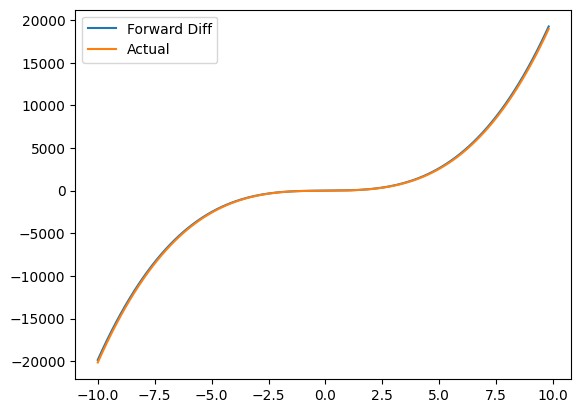

In [89]:
#Create plot
plt.figure()
plt.plot(xalt,dy,label='Forward Diff')
plt.plot(xalt,yprime,label='Actual')
plt.legend()
plt.show()

Calculate the maximum error between the forward difference and the actual solution from the previous plot. Compare with the value of the step size $h$ to determine if the error is reasonable.

In [90]:
max_error = max(abs(yprime - dy))
print(f'The maximum error is: {max_error:.2e}')

stepsize=x[1]-x[0]
print(f'The stepsize is: {stepsize:.2e}')

The maximum error is: 2.99e+02
The stepsize is: 1.00e-01


## Activity 2: The Central Difference Method

### Start by examining the code below which has implemented the central difference algorithm

### The function provided below computes the descrete version of the central difference. Take a look at the code to verify that it works (you might also want to check out the functionality of np.roll() as it is used here). 

In [91]:
# Take a look at the code to verify that it does what you'd expect
def CentralDiff(x,y): 
    h=x[1]-x[0] #find h based on delta x of data points
    forward = np.roll(y,-1) #forward step
    backward = np.roll(y,+1) #backward step
    dycd=(forward-backward)/(2*h) #perform difference
    dycd=dycd[1:-1] #trim boundaries
    dxcd=x[1:-1] #trim boundaries
    return dxcd, dycd #return the array of the central difference values

Following from the previous example with the forward derivative, take a numeric derivative of our original function $y = 3x^2+2x$. 

In [92]:
# create grid of x values and evaluate our function to get y(x)
x = np.arange(-10,10, 1e-1)
y = 3*x**2 + 2*x

# find analytic derivative using our function, specify h to be close to our delta x in the data grid
xalt,dy = CentralDiff(x,y)

#define the known analytic derivative for comparison - use the xalt array so that y prime and y will have the same length
yprime = 6*xalt+2

Plot and compare results

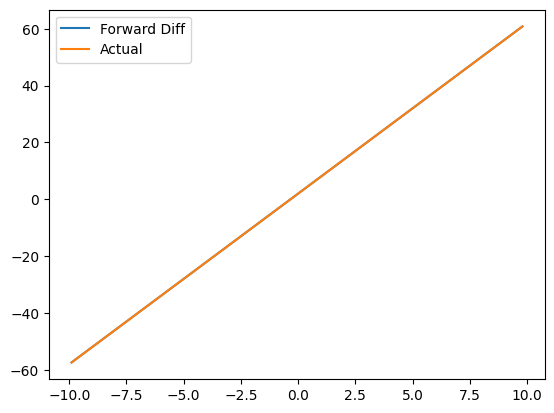

In [93]:
#Create plot
plt.figure()
plt.plot(xalt,dy,label='Forward Diff')
plt.plot(xalt,yprime,label='Actual')
plt.legend()
plt.show()

Check error and compare with earlier result

In [94]:
max_error = max(abs(yprime - dy))
print(f'The maximum error is: {max_error:.2e}')

stepsize=x[1]-x[0]
print(f'The stepsize is: {stepsize:.2e}')

The maximum error is: 1.28e-12
The stepsize is: 1.00e-01


Note this is a significant improvement!

## Activity 3: Choice of Step Size

### What if we modified our forward difference formula so that we can specify step size? What could go wrong?

In [95]:
def forwardDiff2(x, y, h = 1E-5):
    yprime=np.diff(y)/h # get forward differences 
    xdiff=x[:-1:] # find corresponding x differences 
    return xdiff, yprime #return the arrays of forward difference values

Intuition might tell you that smaller step size is better, however this is dangerous! Note the default $h$ in our function is now much smaller than it was in the earlier version. Let's investigate what this does...

Let's test this new implementation on our function $y = 3x^2+2x$ and examine the results

In [125]:
# create grid of x values and evaluate our function to get y(x)
x = np.arange(-10,10,1E-5)
y = 3*x**2 + 2*x

# find analytic derivative using our function, specify h to be close to our delta x in the data grid
xalt,dy = forwardDiff2(x,y)

#define the known analytic derivative for comparison - use the xalt array so that y prime and y will have the same length
yprime = 6*xalt+2

Plot and compare the result

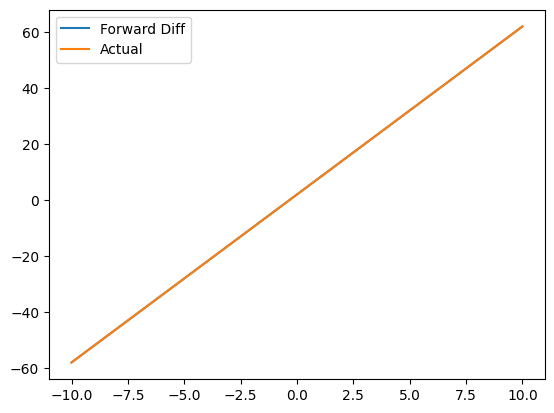

In [97]:
#Create plot
plt.figure()
plt.plot(xalt,dy,label='Forward Diff')
plt.plot(xalt,yprime,label='Actual')
plt.legend()
plt.show()

Note the shocking difference here... With the small $h$ choice, we're getting dominated by round off errors!

### Repeat the process above, but try a few different specified h values (e.g, 1E-2, 5E-1, 1E-1, 0.5) and compare the results. Which works best and why?

In [133]:
# example code
h1 = 3E-1
h2 = 1E-2
h3 = 1E-5

xalt, dy = forwardDiff2(x,y,h=h1)
xalt2, dy2 = forwardDiff2(x,y,h=h2)
xalt3, dy3 = forwardDiff2(x,y,h=h3)

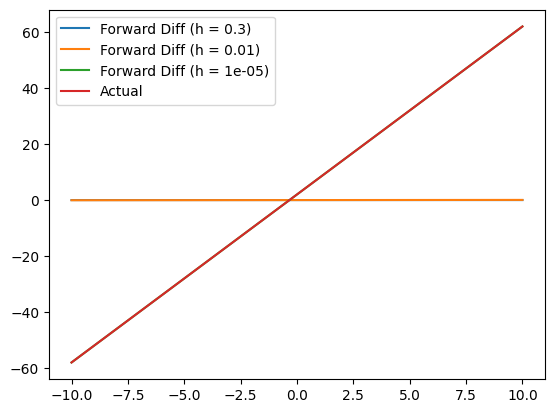

In [135]:
#Create plot
plt.figure()
plt.plot(xalt,dy,label=f'Forward Diff (h = {h1})')
plt.plot(xalt2,dy2,label=f'Forward Diff (h = {h2})')
plt.plot(xalt3,dy3,label=f'Forward Diff (h = {h3})')
plt.plot(xalt,yprime,label='Actual')
plt.legend()
plt.show()

From this part, I hope you can easily see that choice of $h$ is extremely important and can lead to junk results if you are not careful! Best practice is always using $h$ comparable to $\Delta x$

## Activity 4: Working with Noisy Data

In real world environments, data collected always has noise. As discussed in class, working with noisy data can be troublesome when taking a numeric derivative. Here we will explore techniques for handling noisy data. 

Imagine we are collecting data for a system whose position can be described by the $\sin(x)$ function (think oscillitory things like mass-springs, etc.). Suppose the system has some sort of higher order frequency behavior, which is interpreted as noise for the sake of the experiment. The noise can be modeled as $\epsilon \sin(\omega x)$, where $\epsilon$ is the noise amplitude and $\omega$ is the angular frequency for the noise term. Putting this together gives us the form: $f(x) = A \sin(x) + \epsilon \sin(\omega x)$. A function that models the system is provided below, which takes arguments $A, \epsilon, \omega$, and an array of $x$ values and returning an array $f(x)$. 

In [138]:
def NoisySine(x,A,eps,w):
    fx=A*np.sin(x)+eps*np.sin(w*x)
    return fx

Now let's look at the function plotted to get a better sense of it. As an example, we will use values $A = 5, \epsilon = 1.0, \omega=30$ over the range $[0,2\pi]$. For comparison purposes, we'll also include an entry for the model that does not have a noise term.

In [139]:
x = np.linspace(0,2*np.pi,100) # array of x values

example_data=NoisySine(x,5,1.0,30) # evaluate our noisy sine function with given parameters

no_noise=NoisySine(x,5,0.0,30) # create example of sine function without added noise -> set epsilon to zero

Plot and comparre the results

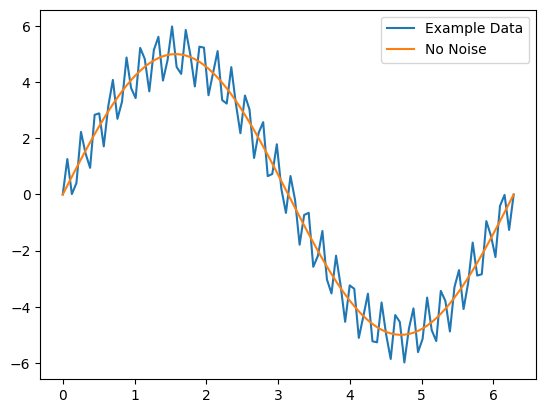

In [140]:
plt.figure()
plt.plot(x,example_data,label='Example Data')
plt.plot(x,no_noise,label='No Noise')
plt.legend()
plt.show()

Now let's consider taking a derivative. We can easily show that our function $f(x)$ with the given noise term has a derivative $f'(x) = A \cos(x) + \omega \epsilon \cos(\omega x)$. Note the behavior if $\omega$ is large, the amplitude of the error term in the derivative can be much larger than the amplitude of the 'true' function. Let's take a closer look here...

In [ ]:
data_prime= 5*np.cos(x) + 30*1.0*np.cos(30*x) #noisy function analytic derivative

noiseless_prime = 3*np.cos(x) # analytic derivative of no noise function


Plot and compare the results

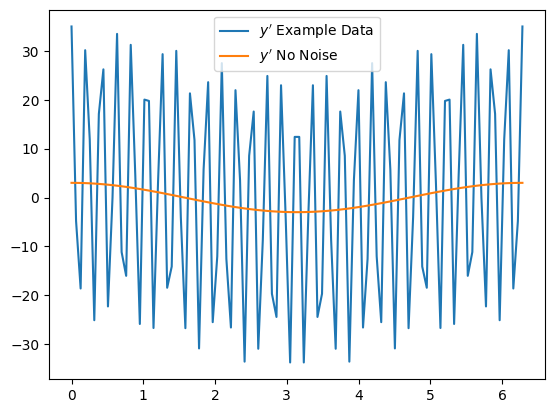

In [142]:
plt.figure()
plt.plot(x,data_prime,label=r'$y^{\prime}$ Example Data')
plt.plot(x,noiseless_prime,label=r'$y^{\prime}$ No Noise')
plt.legend()
plt.show()

## Data Smoothing
Smooting is a common technique when working with noisy data. We will look at this to improve the results of the last few cells. Start by examining the function below, which performs smoothing on the data $f(x)$ by taking an average of the input array from $i−n$ to $i+n$, for each element $i$ with smoothing radius $n$. 

In [143]:
def smooth(x,n):
    A=np.zeros((n,len(x)))
    for i in range(0,n):
        A[i]=np.roll(x,i)
    sdata=np.mean(A,axis=0)
    sdata=np.roll(sdata,int(-n/2))
    return sdata

Although there is certainly more than one way to perform smoothing, check out the behavior of $np.roll()$ which is very useful for our purpose here. Also, note that we have assumed the data wraps around on the endpoints, which is fine for our sine function, but be careful if our data is not perodic in nature. You will need different boundary conditions in those events!

Refer back to your earlier work with the example function $f(x) = A \sin(x) + \epsilon \sin(\omega x)$. Create a plot using the same values of $A, \epsilon,$ and $\omega$ over the range $[0,2\pi]$ like before. This time include an additional curve for a smoothed version of this function with $n=5$. for comparison.

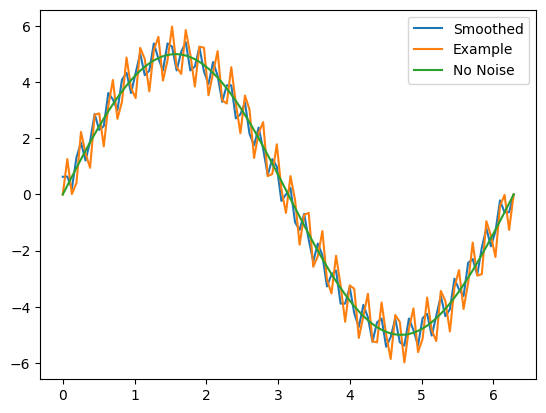

In [169]:
smoothed_data=smooth(example_data,2) #run smoothing on the example data


#Plot and compare the smoothed_data, example_data, and no_noise
plt.figure()
plt.plot(x, smoothed_data, label = "Smoothed")
plt.plot(x, example_data, label = "Example")
plt.plot(x, no_noise, label = "No Noise")


#####################
plt.legend()
plt.show()



Use our earlier function for calculating the numeric derivative via the central difference. Use this to find the derivative of the unsmoothed function (example_data) and the smoothed function (smoothed_data).

In [170]:
### add your code here
xalt, dsmooth_dx = CentralDiff(x, smoothed_data)
xalt, dexample_dx = CentralDiff(x, example_data)

 Create a plot below to compare the results. Additionally, include a curve for the analtic derivative of the noisy function ($f'(x) = A \cos(x) + \omega \epsilon \cos(\omega x)$ similar to before. 

In [171]:
def NoisyCos(x,A,eps,w):
    fx=A*np.cos(x)+ w*eps*np.sin(w*x)
    return fx

In [172]:
danalytic_dx = NoisyCos(xalt, 1, 0.5, 30)

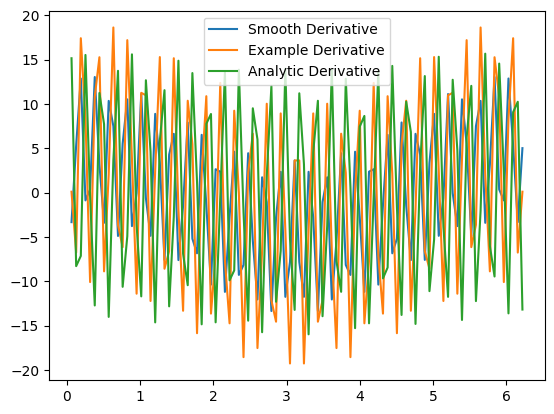

In [173]:
plt.figure()
### Add code here ####
plt.plot(xalt, dsmooth_dx, label = "Smooth Derivative")
plt.plot(xalt, dexample_dx, label = "Example Derivative")
plt.plot(xalt, danalytic_dx, label = "Analytic Derivative")

#####################
plt.legend()
plt.show()

Repeat the cells above trying different values of smoothing. Note that a good choice of smoothing can allow the numeric derivative to  approximate the `true' function derivative as if there was not noise. 